# Data Visualization

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
'''
NOTE: when using VSCode, change the Jupyter Extension Notebook File Root setting from ${fileDirname} to ${workspaceRoot}
in order to have relative paths work when importing csv. Setting makes the project folder the root directory,
not the folder where this notebook is saved
'''

import os
os.getcwd()

'c:\\Users\\rgkal\\Documents\\chem_reactor_ml'

## 1. Visualizing the Original Training Data

In [15]:
df = pd.read_csv('data_generation/reactor_performance_data.csv')

In [16]:
df.head()

,Mode,Fao,Fbo,P,To,Cto,m,Ta,T_max,Fa_out,Fb_out,Fc_out,Fd_out,Cc_out,Xa,Yc
0,1.0,5.882026,10.400157,5.401539,320.168039,0.205743,13.735116,315.471541,679.794715,0.102315,0.527264,3.671550,1.264897,0.067633,0.982606,0.635248
1,1.0,5.475044,9.848643,4.869216,303.695387,0.195527,10.288087,339.179167,671.396786,0.080109,0.519658,3.568828,1.095664,0.063673,0.985368,0.661514
2,1.0,5.380519,10.121675,5.138381,303.003069,0.206807,12.988158,322.999707,663.932415,0.080231,0.659127,3.877753,0.853521,0.071254,0.985089,0.731612
3,1.0,5.156534,9.145904,3.663929,305.882567,0.146076,11.728872,317.763891,645.334336,0.111622,0.462524,3.286858,1.054833,0.048780,0.978353,0.651519
4,1.0,6.134877,8.545634,4.942513,298.315345,0.202050,13.065558,339.326248,641.188197,0.443521,0.190459,1.906934,2.270653,0.037844,0.927705,0.335058


In [17]:
df.isnull().sum()

Mode      0
Fao       0
Fbo       0
P         0
To        0
Cto       0
m         0
Ta        0
T_max     0
Fa_out    0
Fb_out    0
Fc_out    0
Fd_out    0
Cc_out    0
Xa        0
Yc        0
dtype: int64

In [18]:
df.describe().transpose().apply(lambda s: s.apply('{0:.3f}'.format))

,count,mean,std,min,25%,50%,75%,max
Mode,10000.000,1.500,0.671,1.000,1.000,1.000,2.000,3.000
Fao,10000.000,4.300,0.998,2.510,3.132,4.578,5.100,6.902
Fbo,10000.000,7.893,2.865,3.281,4.182,9.143,10.197,13.468
P,10000.000,6.684,2.378,3.080,4.813,5.361,9.550,11.729
To,10000.000,369.620,92.200,266.751,298.081,308.060,493.219,526.187
Cto,10000.000,0.216,0.033,0.122,0.193,0.214,0.240,0.389
m,10000.000,8.252,2.790,0.680,5.378,8.464,10.468,17.603
Ta,10000.000,325.064,8.488,292.980,320.076,325.016,330.148,361.104
T_max,10000.000,664.426,39.373,484.978,639.833,659.031,691.317,857.328
Fa_out,10000.000,0.144,0.185,0.000,0.028,0.096,0.199,2.288


In [19]:
df_1 = df[df['Mode'] == 1.0]
df_2 = df[df['Mode'] == 2.0]
df_3 = df[df['Mode'] == 3.0]

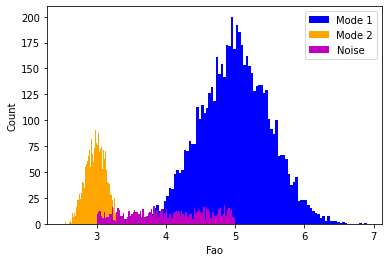

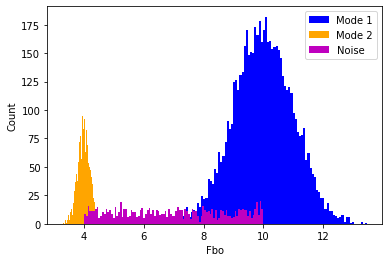

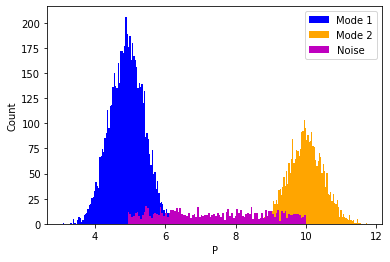

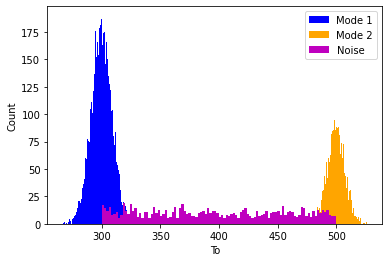

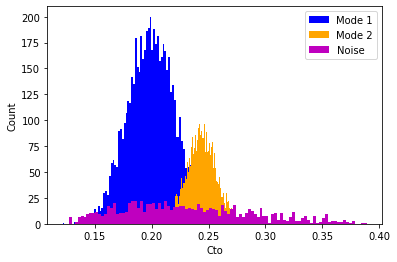

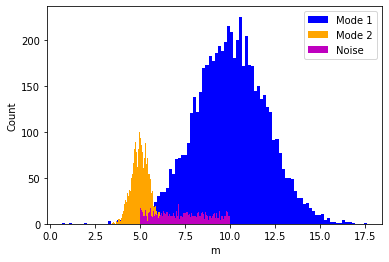

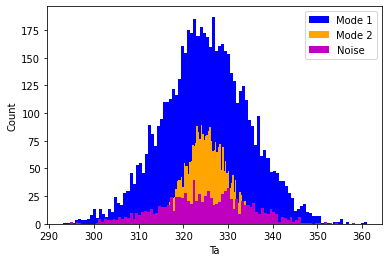

In [20]:
input_value_cols = ['Fao', 'Fbo', 'P', 'To', 'Cto', 'm', 'Ta']
for i, col in enumerate(df[input_value_cols]):
    plt.figure(i)
    plt.hist(df_1[col], bins=100, color='b', label='Mode 1')
    plt.hist(df_2[col], bins=100, color='orange', label='Mode 2')
    plt.hist(df_3[col], bins=100, color='m', label='Noise')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend()

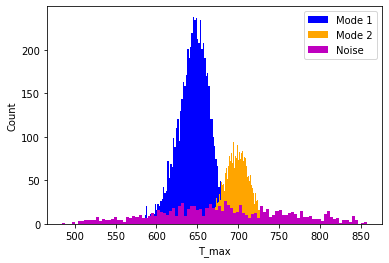

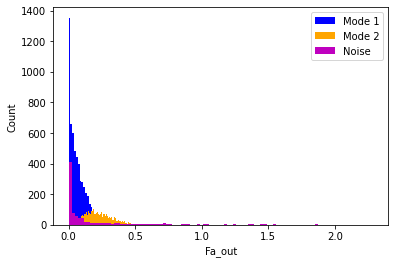

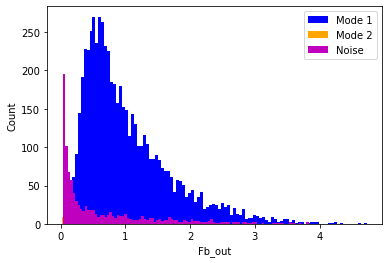

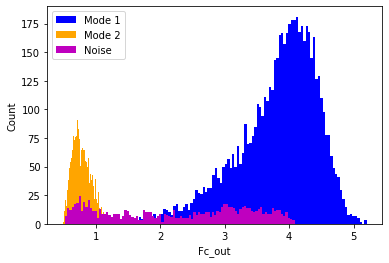

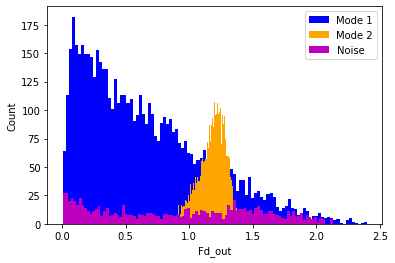

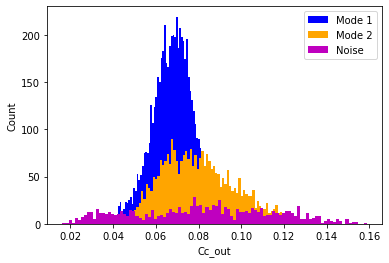

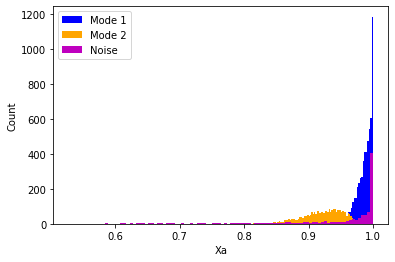

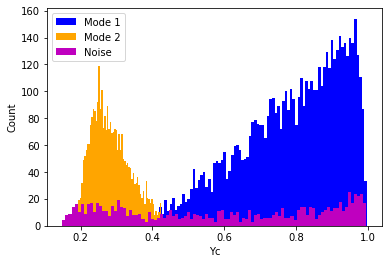

In [21]:
output_value_cols = ['T_max', 'Fa_out', 'Fb_out', 'Fc_out', 'Fd_out', 'Cc_out', 'Xa', 'Yc']
for i, col in enumerate(df[output_value_cols]):
    plt.figure(i)
    plt.hist(df_1[col], bins=100, color='b', label='Mode 1')
    plt.hist(df_2[col], bins=100, color='orange', label='Mode 2')
    plt.hist(df_3[col], bins=100, color='m', label='Noise')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend()

## 2. Visualizing New Data

The following code plots visualizations comparing the original training data with the new generated data. From the plots, it is possible to see if data drift has occured.

In [22]:
df_new = pd.read_csv('data_generation/new_data.csv')

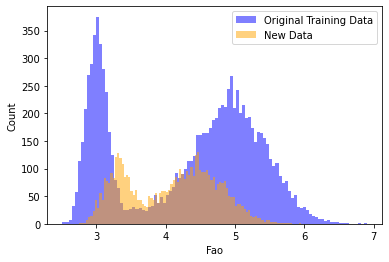

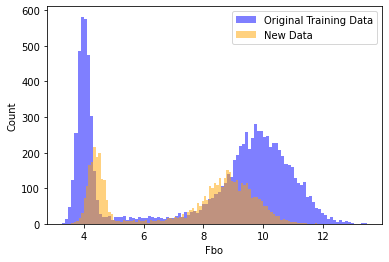

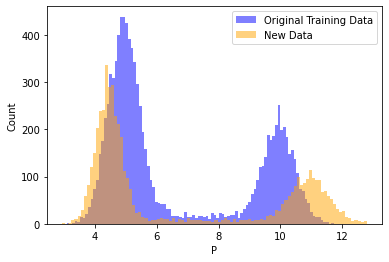

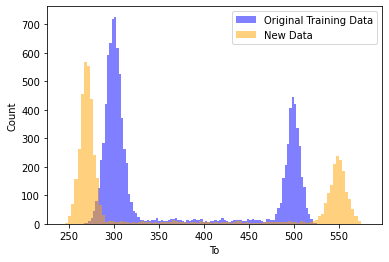

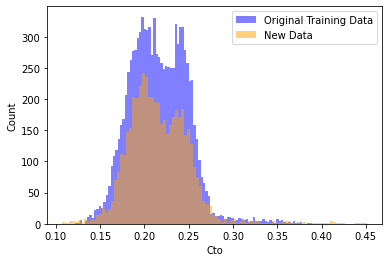

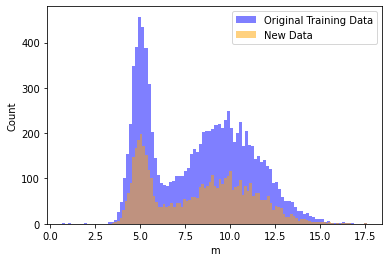

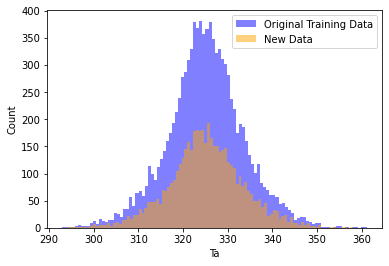

In [23]:
input_value_cols = ['Fao', 'Fbo', 'P', 'To', 'Cto', 'm', 'Ta']
for i, col in enumerate(df[input_value_cols]):
    plt.figure(i)
    plt.hist(df[col], bins=100, color='b', label='Original Training Data', alpha=0.5)
    plt.hist(df_new[col], bins=100, color='orange', label='New Data', alpha=0.5)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend()

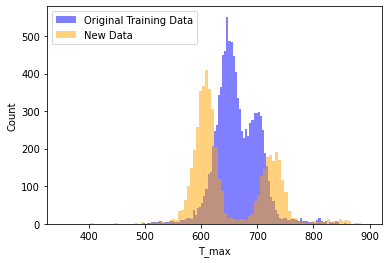

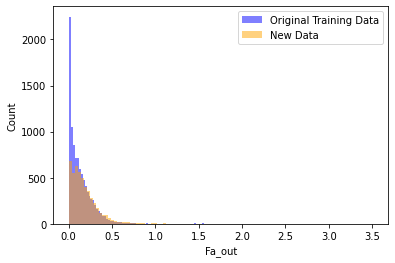

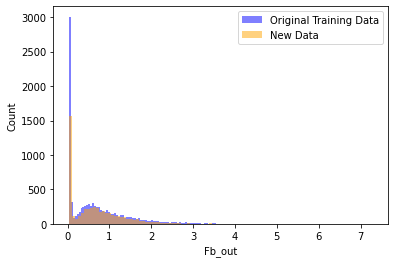

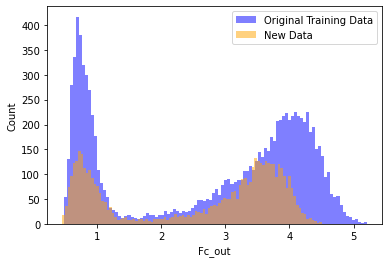

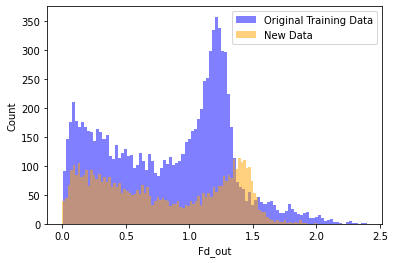

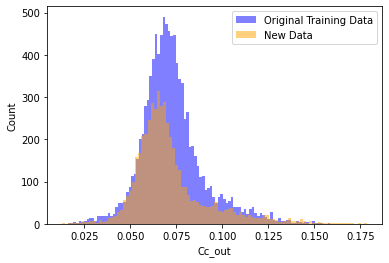

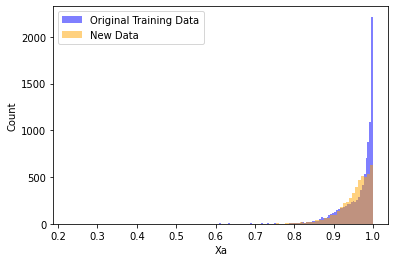

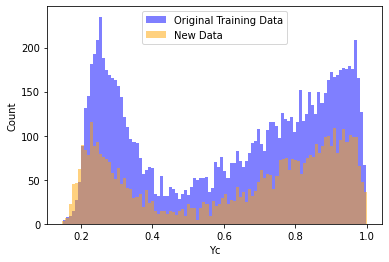

In [24]:
output_value_cols = ['T_max', 'Fa_out', 'Fb_out', 'Fc_out', 'Fd_out', 'Cc_out', 'Xa', 'Yc']
for i, col in enumerate(df[output_value_cols]):
    plt.figure(i)
    plt.hist(df[col], bins=100, color='b', label='Original Training Data', alpha=0.5)
    plt.hist(df_new[col], bins=100, color='orange', label='New Data', alpha=0.5)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend()